In [ ]:
!pip install shap

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import shap

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [3]:
src = 'https://raw.githubusercontent.com/SMAMHTN/Final-Project-Microcredential/main/Pengerjaan/indeks-standar-pencemar-udara-di-spku-bulan-januari-juli-2021.csv'
data = pd.read_csv(src)
print('Jumlah data : ',len(data.index))
data.head()

Jumlah data :  1060


,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53,PM25,SEDANG


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1060 non-null   object 
 1   stasiun   1060 non-null   object 
 2   pm10      1024 non-null   float64
 3   pm25      980 non-null    float64
 4   so2       1041 non-null   float64
 5   co        1035 non-null   float64
 6   o3        1024 non-null   float64
 7   no2       1038 non-null   float64
 8   max       1060 non-null   int64  
 9   critical  1052 non-null   object 
 10  categori  1060 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 91.2+ KB


In [ ]:
data.describe()

,pm10,pm25,so2,co,o3,no2,max
count,1024.000000,980.000000,1041.000000,1035.000000,1024.000000,1038.000000,1060.000000
mean,52.332031,78.964286,32.711816,12.613527,32.474609,19.191715,77.402830
std,15.392268,24.836251,12.071006,5.570144,16.339726,9.408794,25.365189
min,14.000000,13.000000,2.000000,3.000000,9.000000,1.000000,0.000000
25%,41.000000,61.000000,24.000000,9.000000,21.000000,13.000000,59.000000
50%,54.000000,79.000000,30.000000,12.000000,28.000000,18.000000,77.000000
75%,63.000000,94.000000,41.000000,15.000000,40.000000,25.000000,93.000000
max,95.000000,174.000000,74.000000,47.000000,151.000000,63.000000,174.000000


## Data Cleaning

In [4]:

# Checkin data for missing value
data.isnull().sum()

tanggal      0
stasiun      0
pm10        36
pm25        80
so2         19
co          25
o3          36
no2         22
max          0
critical     8
categori     0
dtype: int64

Ternyata ada banyak data yang missing, sehingga diputuskan kami akan menghapus data yang kosong daripada mengisinya

In [5]:
data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 1059
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   902 non-null    object 
 1   stasiun   902 non-null    object 
 2   pm10      902 non-null    float64
 3   pm25      902 non-null    float64
 4   so2       902 non-null    float64
 5   co        902 non-null    float64
 6   o3        902 non-null    float64
 7   no2       902 non-null    float64
 8   max       902 non-null    int64  
 9   critical  902 non-null    object 
 10  categori  902 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 84.6+ KB


In [12]:
# Menghapus data kolom yang tidak dibutuhkan dalam prediksi kualitas udara, pada kasus ini, kami menganggap lokasi serta max
# kritikal tidak dibutuhkan
data = data.drop(columns=['tanggal','stasiun','max','critical'],axis=1)
print("data memiliki ukuran:", data.shape[0])
print("data memiliki %d fitur"%len(data.columns))

data memiliki ukuran: 902
data memiliki 7 fitur


In [ ]:
data

,pm10,pm25,so2,co,o3,no2,categori
0,38.0,53.0,29.0,6.0,31.0,13.0,SEDANG
1,27.0,46.0,27.0,7.0,47.0,7.0,BAIK
2,44.0,58.0,25.0,7.0,40.0,13.0,SEDANG
3,30.0,48.0,24.0,4.0,32.0,7.0,BAIK
4,38.0,53.0,24.0,6.0,31.0,9.0,SEDANG
...,...,...,...,...,...,...,...
1055,64.0,110.0,32.0,13.0,29.0,35.0,TIDAK SEHAT
1056,70.0,130.0,33.0,17.0,28.0,45.0,TIDAK SEHAT
1057,78.0,140.0,32.0,18.0,29.0,39.0,TIDAK SEHAT
1058,75.0,121.0,37.0,12.0,50.0,21.0,TIDAK SEHAT


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

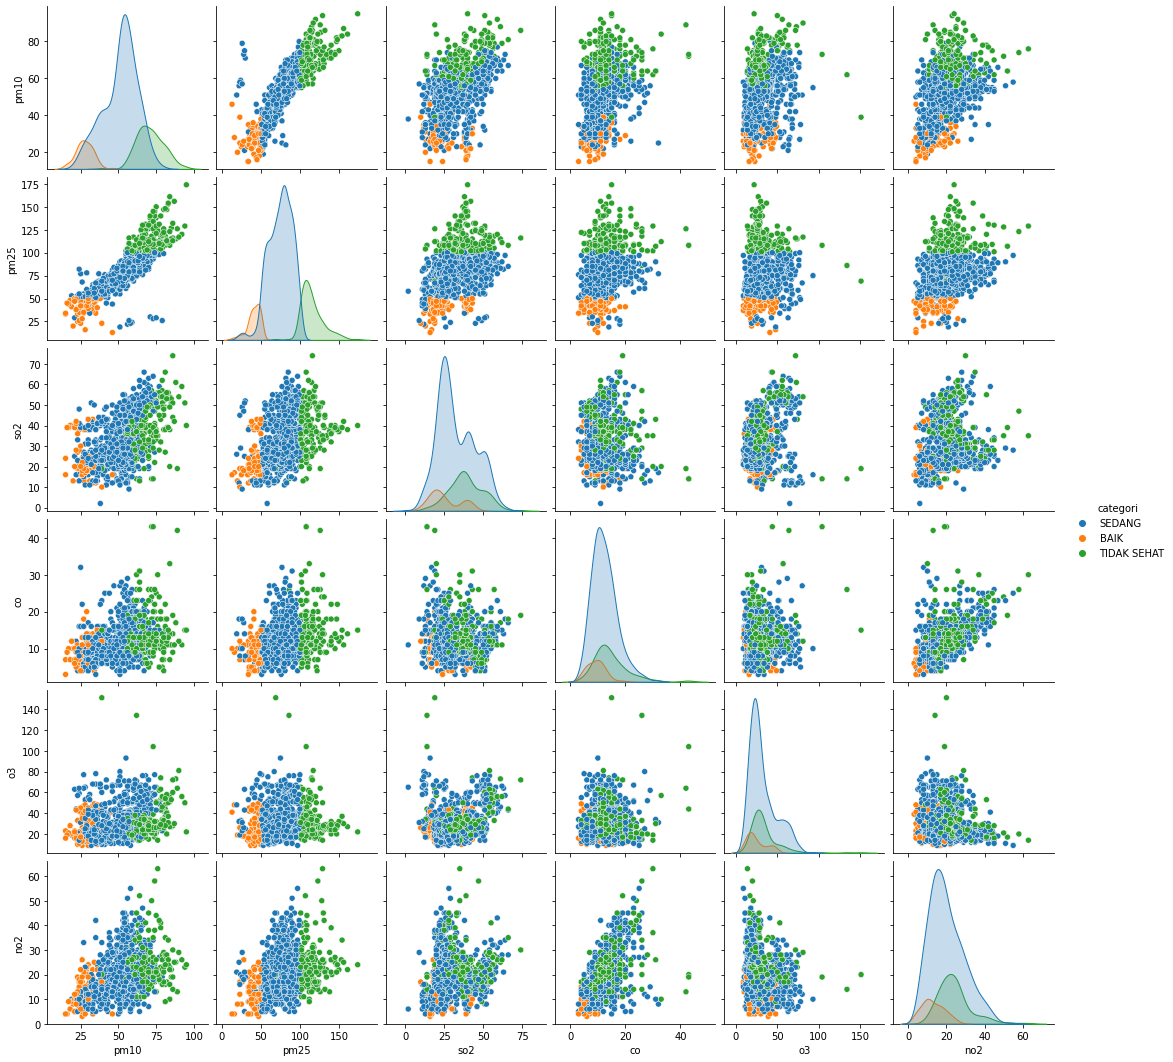

In [ ]:

#Plotting fitur
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data, hue= "categori")
plt.show()

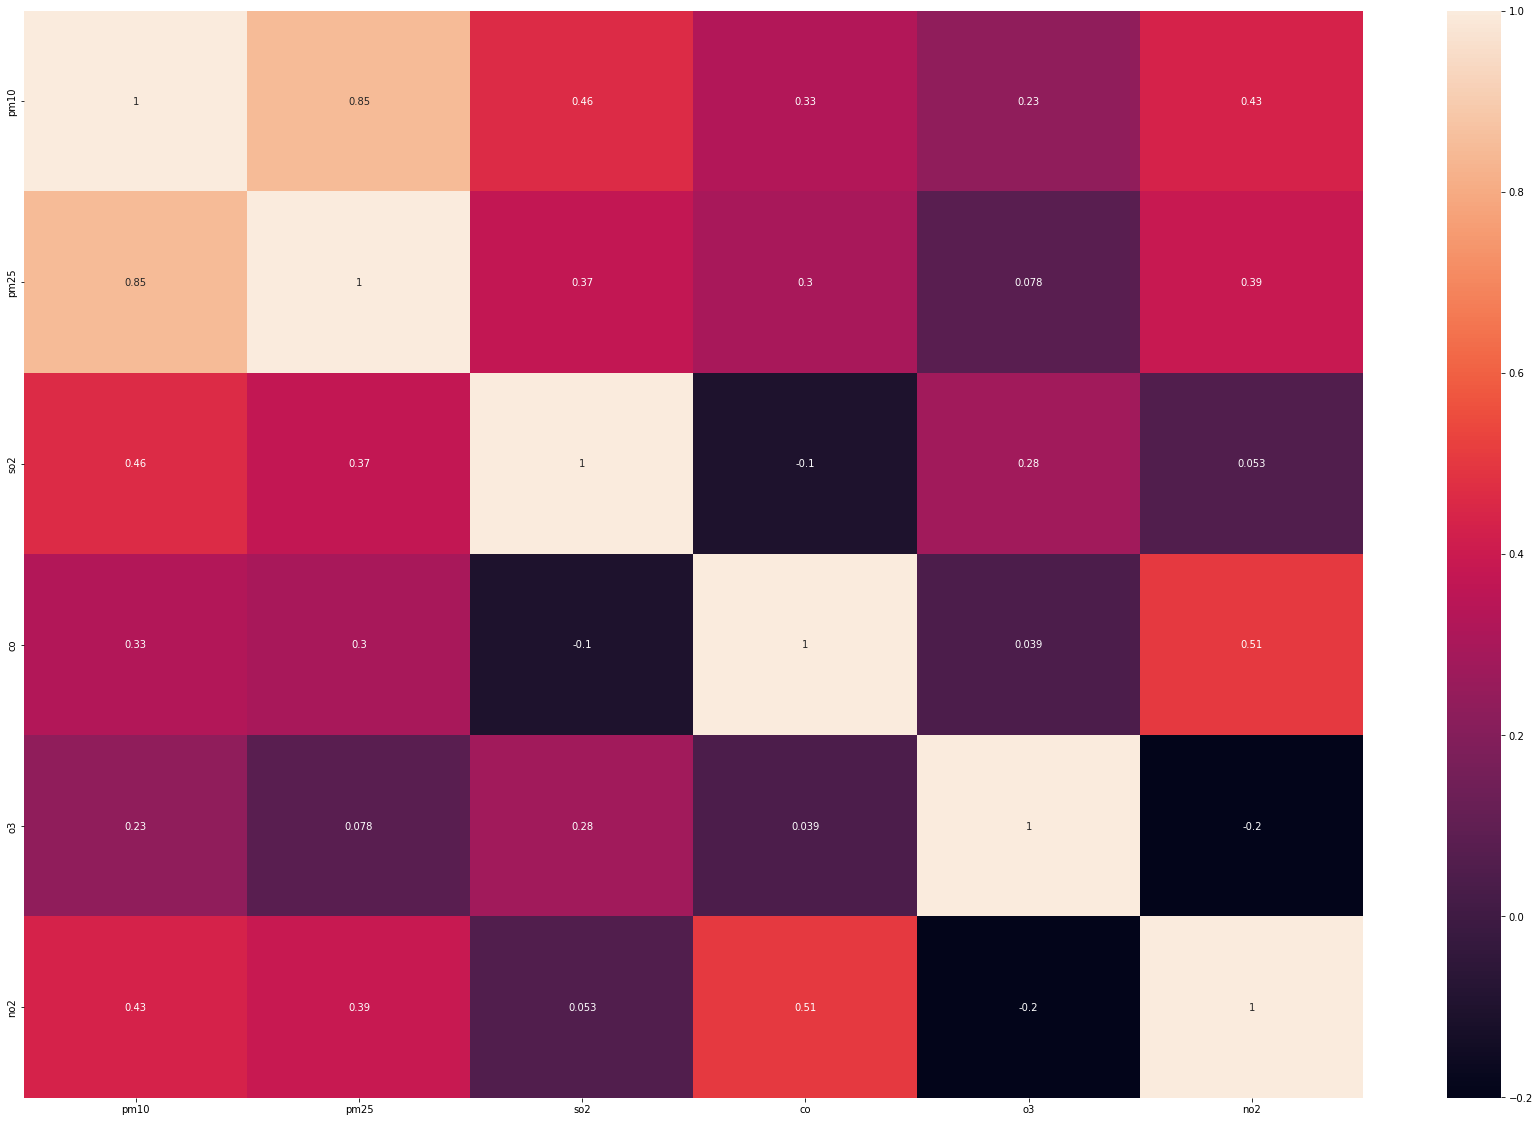

In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(30,20))  
sns.heatmap(corrmat,annot=True)

dari sini kami merasa tidak perlu ada fitur baru dan dari data yang ada sudah cukup dalam melakukan prediksi kualitas udara tersebut, sehingga langsung dalam melakukan berbagai model untuk melihat model mana yang bagus untuk memprediksi yang paling tepat

## Preprocessing

In [14]:
data_copy = data

In [15]:
def preprocessing_inputs(df):
  df = df.copy()
  #split train test
  y = df['categori']
  X = df.drop('categori',axis=1)
  #train test split
  X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,shuffle=True,random_state=1)
  return X_train,X_test,y_train,y_test



In [16]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data_copy)

## Training

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#Metrics
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

**Random Forest Classifier**

In [17]:
model_RandForest = RandomForestClassifier(random_state=1)
model_RandForest.fit(X_train,y_train)

Y_pred = model_RandForest.predict(X_test)

accuracy_rf=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_random_forest = round(model_RandForest.score(X_train, y_train) * 100,2)

cm = confusion_matrix(y_test,Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' % accuracy)
print('precision_Logistic Regression : %.3f' % precision)
print('recall_Logistic Regression: %.3f' % recall)
print('f1-score_Logistic Regression : %.3f' % f1)

Confusion matrix for Logistic Regression
 [[ 17   0   0]
 [  2 200   0]
 [  0   0  52]]
accuracy_Logistic Regression : 0.993
precision_Logistic Regression : 0.993
recall_Logistic Regression: 0.993
f1-score_Logistic Regression : 0.993


**Logistic Regression**

In [ ]:
model_logR = LogisticRegression()
model_logR.fit(X_train,y_train)
Y_pred = model_logR.predict(X_test)

accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(model_logR.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test,Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' % accuracy)
print('precision_Logistic Regression : %.3f' % precision)
print('recall_Logistic Regression: %.3f' % recall)
print('f1-score_Logistic Regression : %.3f' % f1)

Confusion matrix for Logistic Regression
 [[  4  13   0]
 [ 11 190   1]
 [  0   7  45]]
accuracy_Logistic Regression : 0.882
precision_Logistic Regression : 0.882
recall_Logistic Regression: 0.882
f1-score_Logistic Regression : 0.882


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**Naive Bayes**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 

accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
cm = confusion_matrix(y_test,Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' % accuracy)
print('precision_Logistic Regression : %.3f' % precision)
print('recall_Logistic Regression: %.3f' % recall)
print('f1-score_Logistic Regression : %.3f' % f1)


Confusion matrix for Logistic Regression
 [[ 17   0   0]
 [ 14 168  20]
 [  0   7  45]]
accuracy_Logistic Regression : 0.849
precision_Logistic Regression : 0.849
recall_Logistic Regression: 0.849
f1-score_Logistic Regression : 0.849


Membandingkan akurasi masing masing model

In [ ]:
results = pd.DataFrame({
      'Model': [ 'Logistic Regression',
                 'Naive Bayes', 
                 'Random Forest Classification'],
      'Score': [ acc_log,
                 acc_gaussian,
                 acc_random_forest],
      'Accuracy_score':[accuracy_lr,
                        accuracy_nb,
                        accuracy_rf,
      ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Random Forest Classification,100.00,99.26
1,Logistic Regression,87.96,88.19
2,Naive Bayes,89.38,84.87


Bisa dilihat, bahwa dengan random forest classification dapat didapat akurasi skor lebih baik dari metode yang lain, sehingga pada projek kali ini akan digunakan model Random Tree Classification 

## Predicting

In [ ]:
predicting= np.reshape((120,99,34,55,19,55),(1,-1))
predicting

array([[120,  99,  34,  55,  19,  55]])

# Feature Impact


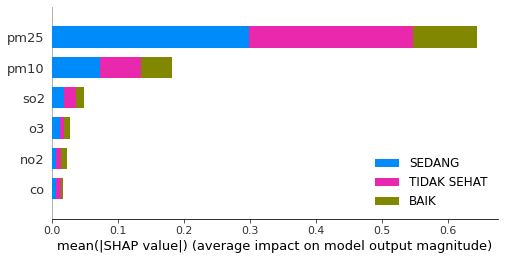

In [ ]:
explainer = shap.TreeExplainer(model)
explainer_values = explainer.shap_values(X_test)
shap.summary_plot(explainer_values,X_test,class_names=model.classes_)


In [ ]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train.drop(columns=['so2','o3','no2','co'],axis=1),y_train)
acc = model.score(X_test.drop(columns=['so2','o3','no2','co'],axis=1),y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 98.15%


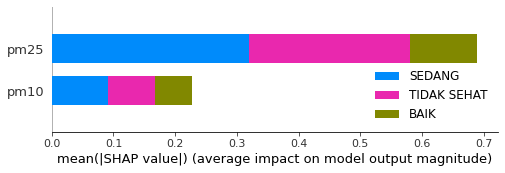

In [ ]:
explainer = shap.TreeExplainer(model)
explainer_values = explainer.shap_values(X_test.drop(columns=['so2','o3','no2','co'],axis=1))
shap.summary_plot(explainer_values,X_test.drop(columns=['so2','o3','no2','co'],axis=1),class_names=model.classes_)

## Exporting Model

In [ ]:
import joblib

In [ ]:
from joblib import dump, load
dump(model_RandForest, 'ModelRF.joblib') 

['ModelRF.joblib']

In [ ]:
from keras.models import load_model
model_RandForest('model.h5')
import pickle
pickle.dump(regressor, open('model.pkl','wb'))
joblib.dump(model_RandForest, "filename.cls")

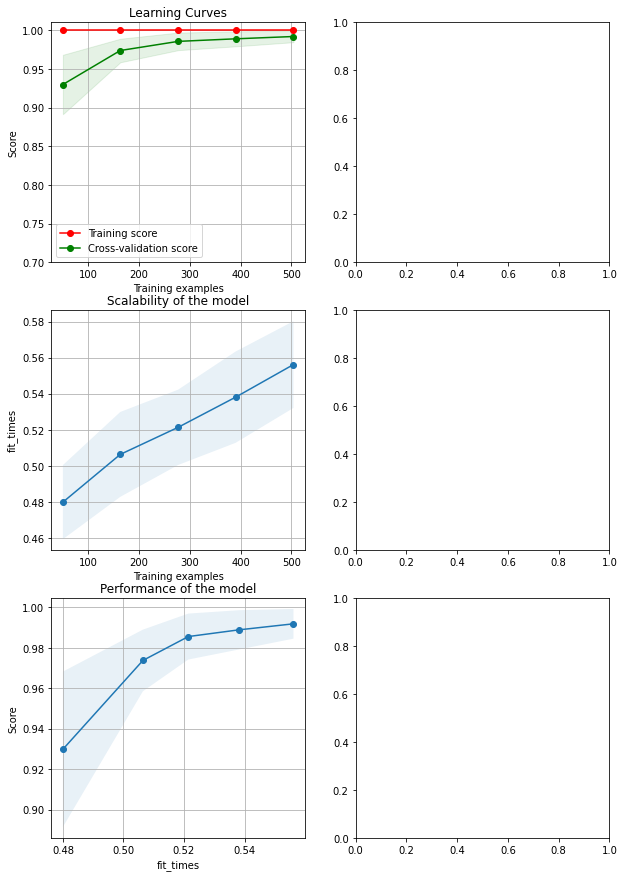

In [20]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(random_state=1)
plot_learning_curve(
    estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)


plt.show()